## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Wednesday, 9th October submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

In [1]:
# importing all the necessary libraries

from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [2]:
# splitting the wine dataset into X and y where y is the type of wine and X contains the featrues associated with each class of wine

y= df_wine.iloc[:,0].values
X=df_wine.iloc[:,1:].values

#Stardardizing the values of X

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [3]:
# finding the ratio of variance explained by each principal component

pca = PCA()
X_train_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

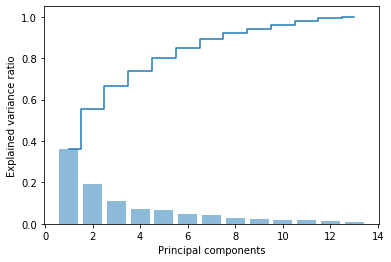

In [4]:
# ploting the ratio explained by each components along with the cumulative variance explained 

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [5]:
# Extracting two components and fitting the model to our data

pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

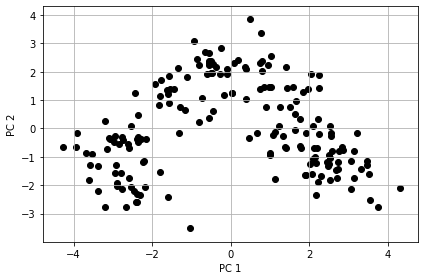

In [6]:
# Plotting the two extracted components 

for l in zip(np.unique(y)):
    plt.scatter(X_pca[y == l, 0], 
                X_pca[y == l, 1], 
                c="black")

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid()
plt.tight_layout()
plt.show()

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 

Reference plot is given below: 

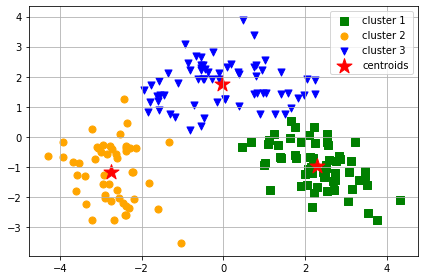

In [7]:
# Using k-means clustering to make clusters in the graph seen above

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # how many clusters
            init='random', 
            n_init=10,    
            max_iter=300, 
            tol=1e-04,    
            random_state=0)
y_km = km.fit_predict(X_pca)

plt.scatter(X_pca[y_km == 0, 0],
            X_pca[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(X_pca[y_km == 1, 0],
            X_pca[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X_pca[y_km == 2, 0],
            X_pca[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
# Matching the labels given by k means to actual labels of y

k_labels = km.labels_ 
y_pred = np.empty_like(k_labels)

for k in np.unique(k_labels):
    # Finding and assigning the best-matching actual label to the labels given by k means
    match_nums = [np.sum((k_labels==k)*(y==t)) for t in np.unique(y)]
    y_pred[k_labels==k] = np.unique(y)[np.argmax(match_nums)]

In [9]:
# finding accuracy of k-means

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y)

0.9662921348314607

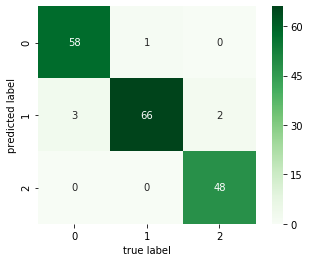

In [10]:
# plotting the confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="Greens")
plt.xlabel('true label')
plt.ylabel('predicted label');

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

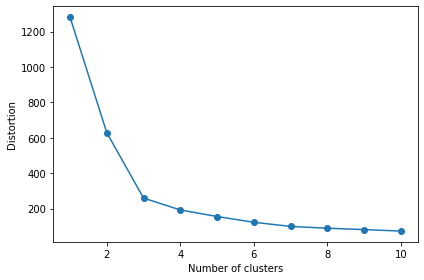

In [11]:
# plotting distortions of k means clustering for k=1 to k=10 where input data is the PCA'ed dataset with 2 components

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_pca)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Elbow of the curve is identified at number of clusters (k) = 3